In [1]:
import os
import math
import numpy as np
import pandas as pd
import requests, sys
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [50]:
input_dir=os.path.join(r'Z:\balint\numt\mice_strains_numt/csvs/')
dfs=pd.Series(os.listdir(r'Z:\balint\numt\mice_strains_numt/csvs/')).apply(lambda file: pd.read_csv(input_dir+file))

In [3]:
dfs.index=pd.Series(os.listdir(r'Z:\balint\numt\mice_strains_numt/')).apply(lambda filename:filename[:-10])

In [168]:
sum(dfs.apply(lambda df:len(df)))

2662

In [174]:
#correct artefacts
def del_artefacts(df):
    df=df[df['mt_start']<17000]
    return df
dfs=dfs.apply(del_artefacts)
sum(dfs.apply(lambda df:len(df)))

2627

In [177]:
dfs.index=pd.Series(os.listdir(r'Z:\balint\numt\mice_strains_numt/csvs/')).apply(lambda filename:filename[:-10])

In [178]:
length_of_numts=dfs.apply(lambda df: sum(df['g_length']))
length_of_numts

Mus_musculus_129s1svimj    56351
Mus_musculus_aj            57652
Mus_musculus_akrj          56263
Mus_musculus_balbcj        54991
Mus_musculus_c3hhej        54320
Mus_musculus_c57bl6nj      56302
Mus_musculus_casteij       55229
Mus_musculus_cbaj          53885
Mus_musculus_dba2j         55142
Mus_musculus_fvbnj         51399
Mus_musculus_lpj           53871
Mus_musculus_nodshiltj     51575
Mus_musculus               75584
Mus_musculus_nzohlltj      55606
Mus_musculus_pwkphj        45147
Mus_musculus_wsbeij        54058
dtype: int64

In [179]:
number_of_numts=dfs.apply(lambda df: len(df['g_length']))
number_of_numts

Mus_musculus_129s1svimj    166
Mus_musculus_aj            170
Mus_musculus_akrj          165
Mus_musculus_balbcj        163
Mus_musculus_c3hhej        166
Mus_musculus_c57bl6nj      172
Mus_musculus_casteij       158
Mus_musculus_cbaj          168
Mus_musculus_dba2j         161
Mus_musculus_fvbnj         157
Mus_musculus_lpj           166
Mus_musculus_nodshiltj     168
Mus_musculus               152
Mus_musculus_nzohlltj      173
Mus_musculus_pwkphj        150
Mus_musculus_wsbeij        172
dtype: int64

In [180]:
max_numt_sizes=dfs.apply(lambda df: max(df['g_length']))
max_numt_sizes

Mus_musculus_129s1svimj     2615
Mus_musculus_aj             1874
Mus_musculus_akrj           2823
Mus_musculus_balbcj         2313
Mus_musculus_c3hhej         1745
Mus_musculus_c57bl6nj       1745
Mus_musculus_casteij        1942
Mus_musculus_cbaj           2871
Mus_musculus_dba2j          2871
Mus_musculus_fvbnj          2871
Mus_musculus_lpj            2871
Mus_musculus_nodshiltj      1745
Mus_musculus               16298
Mus_musculus_nzohlltj       1736
Mus_musculus_pwkphj         1738
Mus_musculus_wsbeij         1745
dtype: int64

In [181]:
min_numt_sizes=dfs.apply(lambda df: min(df['g_length']))
min_numt_sizes

Mus_musculus_129s1svimj    50
Mus_musculus_aj            50
Mus_musculus_akrj          50
Mus_musculus_balbcj        50
Mus_musculus_c3hhej        50
Mus_musculus_c57bl6nj      54
Mus_musculus_casteij       52
Mus_musculus_cbaj          50
Mus_musculus_dba2j         47
Mus_musculus_fvbnj         50
Mus_musculus_lpj           50
Mus_musculus_nodshiltj     50
Mus_musculus               50
Mus_musculus_nzohlltj      50
Mus_musculus_pwkphj        54
Mus_musculus_wsbeij        50
dtype: int64

In [182]:
avg_numt_lengths=dfs.apply(lambda df: np.mean(df['g_length']))
avg_numt_lengths

Mus_musculus_129s1svimj    339.463855
Mus_musculus_aj            339.129412
Mus_musculus_akrj          340.987879
Mus_musculus_balbcj        337.368098
Mus_musculus_c3hhej        327.228916
Mus_musculus_c57bl6nj      327.337209
Mus_musculus_casteij       349.550633
Mus_musculus_cbaj          320.744048
Mus_musculus_dba2j         342.496894
Mus_musculus_fvbnj         327.382166
Mus_musculus_lpj           324.524096
Mus_musculus_nodshiltj     306.994048
Mus_musculus               497.263158
Mus_musculus_nzohlltj      321.421965
Mus_musculus_pwkphj        300.980000
Mus_musculus_wsbeij        314.290698
dtype: float64

In [183]:
med_numt_lengths=dfs.apply(lambda df: np.median(df['g_length']))
med_numt_lengths

Mus_musculus_129s1svimj    198.5
Mus_musculus_aj            205.5
Mus_musculus_akrj          212.0
Mus_musculus_balbcj        195.0
Mus_musculus_c3hhej        198.5
Mus_musculus_c57bl6nj      216.0
Mus_musculus_casteij       229.0
Mus_musculus_cbaj          193.0
Mus_musculus_dba2j         202.0
Mus_musculus_fvbnj         194.0
Mus_musculus_lpj           192.5
Mus_musculus_nodshiltj     198.5
Mus_musculus               222.0
Mus_musculus_nzohlltj      204.0
Mus_musculus_pwkphj        195.5
Mus_musculus_wsbeij        198.5
dtype: float64

In [184]:
def add_organism_name(organism_name):
    df=dfs[organism_name]
    df['organism_name']=len(df)*[organism_name]

In [185]:
pd.Series(med_numt_lengths.index.values).apply(add_organism_name)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
dtype: object

In [186]:
merged_df=pd.concat(dfs.tolist())

In [187]:
merged_df

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,organism_name
0,1978,0.000000e+00,0.000000e+00,4,79518623,13062,2297,2295,+,+,160637212,ATCTCCATTAACGAAAATGACCCAGACCTCATAAACCCAATCAAAC...,ATCTCCATTAACGAAAATGACCCAGACCTCATAAACCCAATCAAAC...,Mus_musculus_129s1svimj
1,721,0.000000e+00,0.000000e+00,5,85392891,4846,1591,1594,+,+,157702868,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,Mus_musculus_129s1svimj
2,695,0.000000e+00,0.000000e+00,4,6598826,3198,1326,1316,+,+,160637212,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,Mus_musculus_129s1svimj
3,616,2.100000e-276,3.000000e-280,5,4248680,14715,1002,1000,+,+,157702868,GCCATAGTAATTTTTCATCTCCTTTTTCCTTCACAAAACAGGATCA...,GCCCTAGCAATCGTTCACCTCCTCTT-CCTCCACGAAACAGGATCA...,Mus_musculus_129s1svimj
4,564,1.200000e-251,1.700000e-255,4,79515869,12488,654,654,+,+,160637212,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,Mus_musculus_129s1svimj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,41,1.000000e-02,1.500000e-06,1,36914060,10512,72,71,+,-,200111453,CCAGCTAAATGTAGAGAAAAAAATTGTTAGACCGACTGATGCTCCT...,CCAGCTAAATGAAGGGAGAAAA-TTGTTAGGTCTACTGATGCTCCT...,Mus_musculus_wsbeij
170,41,1.000000e-02,1.500000e-06,6,84478732,3835,57,57,+,-,153513294,GTTGGGCCTTCTATAGCTGATGGAAGTCATGGATGAAGTCCGAATT...,GTAGGGCCTTCTATTGCTGATGGTAGTCATGGGTGGAGGCCAAATT...,Mus_musculus_wsbeij
171,41,1.000000e-02,1.500000e-06,11,46650078,3006,77,77,+,-,125138207,ATTTGTTTTGTCTGTGGAAAATTTTATAGTTAGGTTGCTTAGTTCT...,ATTTGCTTTATTTATTGATAGTTTTATGGTTAGGTTGTTTAGTTCT...,Mus_musculus_wsbeij
172,38,2.700000e-01,4.000000e-05,8,37537237,4186,66,66,+,-,132083150,AATAGTATTAGATATTTAATAAATCAGTTAATATGTAGGTCTGAGT...,AATAGTGTAAGATATTTAATGAATCGATTGATGTTTGGGTCTGAGT...,Mus_musculus_wsbeij


In [188]:
genome_sizes=[2732.67,2630,2712.71,2627.34,2701.13,2806.8,
             2653.99,2921.73,2606.16,2588.62,2730.8,2982.06,
             2559.99,2699.27,2559.99,2689.66]#Mb

In [189]:
genome_sizes=pd.Series(genome_sizes,
                      index=dfs.index.values)
genome_sizes

Mus_musculus_129s1svimj    2732.67
Mus_musculus_aj            2630.00
Mus_musculus_akrj          2712.71
Mus_musculus_balbcj        2627.34
Mus_musculus_c3hhej        2701.13
Mus_musculus_c57bl6nj      2806.80
Mus_musculus_casteij       2653.99
Mus_musculus_cbaj          2921.73
Mus_musculus_dba2j         2606.16
Mus_musculus_fvbnj         2588.62
Mus_musculus_lpj           2730.80
Mus_musculus_nodshiltj     2982.06
Mus_musculus               2559.99
Mus_musculus_nzohlltj      2699.27
Mus_musculus_pwkphj        2559.99
Mus_musculus_wsbeij        2689.66
dtype: float64

In [190]:
length_of_numts

Mus_musculus_129s1svimj    56351
Mus_musculus_aj            57652
Mus_musculus_akrj          56263
Mus_musculus_balbcj        54991
Mus_musculus_c3hhej        54320
Mus_musculus_c57bl6nj      56302
Mus_musculus_casteij       55229
Mus_musculus_cbaj          53885
Mus_musculus_dba2j         55142
Mus_musculus_fvbnj         51399
Mus_musculus_lpj           53871
Mus_musculus_nodshiltj     51575
Mus_musculus               75584
Mus_musculus_nzohlltj      55606
Mus_musculus_pwkphj        45147
Mus_musculus_wsbeij        54058
dtype: int64

In [191]:
numt_cont=pd.Series(dfs.index.values).apply(lambda org_name: (length_of_numts[org_name]/1000000)/genome_sizes[org_name])
numt_cont.index=dfs.index.values
numt_cont

Mus_musculus_129s1svimj    0.000021
Mus_musculus_aj            0.000022
Mus_musculus_akrj          0.000021
Mus_musculus_balbcj        0.000021
Mus_musculus_c3hhej        0.000020
Mus_musculus_c57bl6nj      0.000020
Mus_musculus_casteij       0.000021
Mus_musculus_cbaj          0.000018
Mus_musculus_dba2j         0.000021
Mus_musculus_fvbnj         0.000020
Mus_musculus_lpj           0.000020
Mus_musculus_nodshiltj     0.000017
Mus_musculus               0.000030
Mus_musculus_nzohlltj      0.000021
Mus_musculus_pwkphj        0.000018
Mus_musculus_wsbeij        0.000020
dtype: float64

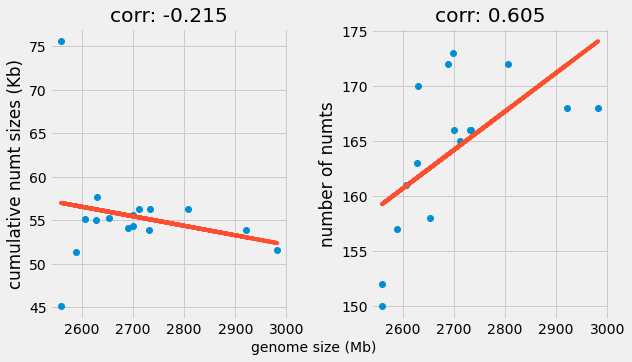

In [192]:
figs_dir=os.path.join(r'Z:\balint\numt\mice_strains_numt/figs/')
plt.style.use('fivethirtyeight')
fig,axs=plt.subplots(1,2,sharex='row', sharey=False, figsize=(9,5))
axs[0].plot(genome_sizes,length_of_numts/1000,'o')
axs[0].set_ylabel('cumulative numt sizes (Kb)')
axs[0].set_title(f'corr: {np.round(np.corrcoef(genome_sizes,length_of_numts)[1][0],decimals=3)}')
m0, b0 = np.polyfit(genome_sizes,length_of_numts/1000, 1)
axs[0].plot(genome_sizes, m0*genome_sizes + b0)

axs[1].plot(genome_sizes,number_of_numts,'o')
axs[1].set_ylabel('number of numts')
axs[1].set_title(f'corr: {np.round(np.corrcoef(genome_sizes,number_of_numts)[1][0],decimals=3)}')
m1, b1 = np.polyfit(genome_sizes,number_of_numts, 1)
axs[1].plot(genome_sizes, m1*genome_sizes + b1)
fig.text(0.4,0.0001, 'genome size (Mb)', fontsize=14)
plt.tight_layout()
plt.savefig(figs_dir+'g_size_numt_count_corr.png',dpi=200)

In [193]:
def identity(row):
    g_seq=row['g_sequence']
    mt_seq=row['mt_sequence']
    indices=pd.Series(np.arange(0,len(g_seq)))
    identical_nucleotides=[]
    indices.apply(lambda index: identical_nucleotides.append(1) if g_seq[index]==mt_seq[index] else
                 identical_nucleotides.append(0))
    seq_identity=sum(identical_nucleotides)/len(g_seq)
    return seq_identity

In [194]:
merged_df['identity']=merged_df.apply(identity,axis=1)
merged_df

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,organism_name,identity
0,1978,0.000000e+00,0.000000e+00,4,79518623,13062,2297,2295,+,+,160637212,ATCTCCATTAACGAAAATGACCCAGACCTCATAAACCCAATCAAAC...,ATCTCCATTAACGAAAATGACCCAGACCTCATAAACCCAATCAAAC...,Mus_musculus_129s1svimj,0.893774
1,721,0.000000e+00,0.000000e+00,5,85392891,4846,1591,1594,+,+,157702868,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,Mus_musculus_129s1svimj,0.710947
2,695,0.000000e+00,0.000000e+00,4,6598826,3198,1326,1316,+,+,160637212,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,Mus_musculus_129s1svimj,0.729182
3,616,2.100000e-276,3.000000e-280,5,4248680,14715,1002,1000,+,+,157702868,GCCATAGTAATTTTTCATCTCCTTTTTCCTTCACAAAACAGGATCA...,GCCCTAGCAATCGTTCACCTCCTCTT-CCTCCACGAAACAGGATCA...,Mus_musculus_129s1svimj,0.756219
4,564,1.200000e-251,1.700000e-255,4,79515869,12488,654,654,+,+,160637212,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,Mus_musculus_129s1svimj,0.876147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,41,1.000000e-02,1.500000e-06,1,36914060,10512,72,71,+,-,200111453,CCAGCTAAATGTAGAGAAAAAAATTGTTAGACCGACTGATGCTCCT...,CCAGCTAAATGAAGGGAGAAAA-TTGTTAGGTCTACTGATGCTCCT...,Mus_musculus_wsbeij,0.833333
170,41,1.000000e-02,1.500000e-06,6,84478732,3835,57,57,+,-,153513294,GTTGGGCCTTCTATAGCTGATGGAAGTCATGGATGAAGTCCGAATT...,GTAGGGCCTTCTATTGCTGATGGTAGTCATGGGTGGAGGCCAAATT...,Mus_musculus_wsbeij,0.859649
171,41,1.000000e-02,1.500000e-06,11,46650078,3006,77,77,+,-,125138207,ATTTGTTTTGTCTGTGGAAAATTTTATAGTTAGGTTGCTTAGTTCT...,ATTTGCTTTATTTATTGATAGTTTTATGGTTAGGTTGTTTAGTTCT...,Mus_musculus_wsbeij,0.701299
172,38,2.700000e-01,4.000000e-05,8,37537237,4186,66,66,+,-,132083150,AATAGTATTAGATATTTAATAAATCAGTTAATATGTAGGTCTGAGT...,AATAGTGTAAGATATTTAATGAATCGATTGATGTTTGGGTCTGAGT...,Mus_musculus_wsbeij,0.787879


In [57]:
merged_df.to_csv(r'Z:\balint\numt/mice_strains_numts.csv')

In [195]:
def base_composition(row, sequence, bases):
    if sequence=='nuclear':
        sequence=row['g_sequence']
    else:
        sequence=row['mt_sequence']
    composition=(sequence.upper().count(bases[0])+sequence.upper().count(bases[1]))/len(sequence)
    return composition

In [196]:
merged_df['GC_cont']=merged_df.apply(base_composition, args=('nuclear',['G','C'],), axis=1)

In [197]:
merged_df['AT_cont']=merged_df.apply(base_composition, args=('nuclear',['A','T'],), axis=1)

In [198]:
merged_df

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,organism_name,identity,GC_cont,AT_cont
0,1978,0.000000e+00,0.000000e+00,4,79518623,13062,2297,2295,+,+,160637212,ATCTCCATTAACGAAAATGACCCAGACCTCATAAACCCAATCAAAC...,ATCTCCATTAACGAAAATGACCCAGACCTCATAAACCCAATCAAAC...,Mus_musculus_129s1svimj,0.893774,0.362212,0.637788
1,721,0.000000e+00,0.000000e+00,5,85392891,4846,1591,1594,+,+,157702868,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,Mus_musculus_129s1svimj,0.710947,0.337638,0.640836
2,695,0.000000e+00,0.000000e+00,4,6598826,3198,1326,1316,+,+,160637212,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,Mus_musculus_129s1svimj,0.729182,0.327082,0.667667
3,616,2.100000e-276,3.000000e-280,5,4248680,14715,1002,1000,+,+,157702868,GCCATAGTAATTTTTCATCTCCTTTTTCCTTCACAAAACAGGATCA...,GCCCTAGCAATCGTTCACCTCCTCTT-CCTCCACGAAACAGGATCA...,Mus_musculus_129s1svimj,0.756219,0.330348,0.666667
4,564,1.200000e-251,1.700000e-255,4,79515869,12488,654,654,+,+,160637212,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,Mus_musculus_129s1svimj,0.876147,0.385321,0.614679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,41,1.000000e-02,1.500000e-06,1,36914060,10512,72,71,+,-,200111453,CCAGCTAAATGTAGAGAAAAAAATTGTTAGACCGACTGATGCTCCT...,CCAGCTAAATGAAGGGAGAAAA-TTGTTAGGTCTACTGATGCTCCT...,Mus_musculus_wsbeij,0.833333,0.416667,0.583333
170,41,1.000000e-02,1.500000e-06,6,84478732,3835,57,57,+,-,153513294,GTTGGGCCTTCTATAGCTGATGGAAGTCATGGATGAAGTCCGAATT...,GTAGGGCCTTCTATTGCTGATGGTAGTCATGGGTGGAGGCCAAATT...,Mus_musculus_wsbeij,0.859649,0.456140,0.543860
171,41,1.000000e-02,1.500000e-06,11,46650078,3006,77,77,+,-,125138207,ATTTGTTTTGTCTGTGGAAAATTTTATAGTTAGGTTGCTTAGTTCT...,ATTTGCTTTATTTATTGATAGTTTTATGGTTAGGTTGTTTAGTTCT...,Mus_musculus_wsbeij,0.701299,0.272727,0.727273
172,38,2.700000e-01,4.000000e-05,8,37537237,4186,66,66,+,-,132083150,AATAGTATTAGATATTTAATAAATCAGTTAATATGTAGGTCTGAGT...,AATAGTGTAAGATATTTAATGAATCGATTGATGTTTGGGTCTGAGT...,Mus_musculus_wsbeij,0.787879,0.242424,0.757576


In [199]:
#https://www.nature.com/articles/s41588-018-0223-8#Sec1
wild_derived=pd.Series(['Mus_musculus_casteij','Mus_musculus_pwkphj','Mus_musculus_wsbeij','Mus_musculus'])
first_lev_mice=pd.concat(wild_derived.apply(lambda strain: merged_df.loc[merged_df['organism_name']==strain]).tolist())
first_lev_mice

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,organism_name,identity,GC_cont,AT_cont
0,1748,0.000000e+00,0.000000e+00,4,77310168,12781,1942,1938,+,+,156060657,TTCATAGCCTGGCAGATGAACAAGACATCCAAAAAATAGGAAACAT...,TTCATAGCCTGGCAGACGAACAAGACATCCGAAAAATAGGAAACAT...,Mus_musculus_casteij,0.901648,0.367147,0.632853
1,1561,0.000000e+00,0.000000e+00,4,77313271,13616,1741,1741,+,+,156060657,ATCATTCAAGTAGCACAACTATATATTGCCGCTACCCCAATCCCTC...,ATCATTCAAGTAGCACAACTATATATTGCCGCTACCCCAATCCCTC...,Mus_musculus_casteij,0.932797,0.364159,0.635841
2,723,0.000000e+00,0.000000e+00,5,84373774,4846,1588,1595,+,+,156282185,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAATAATAACTCACCAAACAaaaactaaacccaacccaATATTTT...,Mus_musculus_casteij,0.709181,0.336414,0.642021
3,635,1.900000e-285,2.700000e-289,5,4292753,14715,1002,998,+,+,156282185,GCCATAGTAATTTTTCATCTCCTTTTTCCTTCACAAAACAGGATCA...,GCCCTAGCAATCGTTCACCTTCTTTT-CCTTCACGAAACAGGATCA...,Mus_musculus_casteij,0.766700,0.331007,0.667996
4,439,3.700000e-192,5.300000e-196,1,134248720,15421,634,632,+,+,200424568,TGTGTACATAAAATTATCTAGTACAATAGAACATTAATGTATatgg...,TGAGTACATAAatttatatagtacaatagtacatctatgtatatcg...,Mus_musculus_casteij,0.823899,0.363208,0.633648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,41,1.000000e-02,1.800000e-06,1,38753807,10510,72,71,+,-,195154279,CCAGCTAAATGTAGAGAAAAAAATTGTTAGACCGACTGATGCTCCT...,CCAGCTAAATGAAGGGAGAAAA-TTGTTAGGTCTACTGATGCTCCT...,Mus_musculus,0.833333,0.416667,0.583333
150,41,1.000000e-02,1.800000e-06,6,84023575,3835,57,57,+,-,149588044,GTTGGGCCTTCTATAGCTGATGGAAGTCATGGATGAAGTCCGAATT...,GTAGGGCCTTCTATTGCTGATGGTAGTCATGGGTGGAGGCCAAATT...,Mus_musculus,0.859649,0.456140,0.543860
151,41,1.000000e-02,1.800000e-06,11,48196043,3006,77,77,+,-,121973369,ATTTGTTTTGTCTGTGGAAAATTTTATAGTTAGGTTGCTTAGTTCT...,ATTTGCTTTATTTATTGATAGTTTTATGGTTAGGTTGTTTAGTTCT...,Mus_musculus,0.701299,0.272727,0.727273
152,38,2.700000e-01,4.700000e-05,8,39205647,4186,66,66,+,-,130127694,AATAGTATTAGATATTTAATAAATCAGTTAATATGTAGGTCTGAGT...,AATAGTGTAAGATATTTAATGAATCGATTGATGTTTGGGTCTGAGT...,Mus_musculus,0.787879,0.242424,0.757576


In [26]:
#get the g id based subdfs
g_id_dfs=pd.Series(first_lev_mice['g_id'].unique()).apply(lambda g_id: first_lev_mice.loc[first_lev_mice['g_id']==g_id])

In [27]:
#get the portion of Mus musculus for every g id
#the lower the portion of Mus Musculus the higher the chance that a newly integrated numt will be discovered
appearance=g_id_dfs.apply(lambda df: df['organism_name'].value_counts()['Mus_musculus']/sum(df['organism_name'].value_counts()))
appearance.index=first_lev_mice['g_id'].unique()
appearance

4     0.225000
5     0.244444
1     0.233333
2     0.153846
9     0.207547
14    0.259259
12    0.250000
17    0.200000
6     0.232558
8     0.232558
18    0.268293
16    0.250000
3     0.250000
7     0.250000
13    0.222222
15    0.250000
11    0.277778
10    0.300000
X     0.307692
MT    1.000000
dtype: float64

In [126]:
selected=first_lev_mice.loc[first_lev_mice['g_id']=='6']
selected=selected.set_index('organism_name')
selected

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,identity,GC_cont,AT_cont
organism_name,,,,,,,,,,,,,,,,
Mus_musculus_casteij,313,3.500000e-132,5.100000e-136,6,79763672,1737,434,429,+,+,152789639,TATGAGTAACAAGAATCTTAATTCTCCAAACATACATGTATAACAA...,TATGAGTAACAAGAATTCCAATTCTCCAGGCATACGCGTATAACAA...,0.807780,0.345538,0.647597
Mus_musculus_casteij,186,9.800000e-72,1.400000e-75,6,116211275,8431,545,542,+,+,152789639,TTCTCAAAACACCTAATTGGCAGTACTACATTAGTTTTATTAA-TA...,TTATTAATGCACCTAATCGGAGGAGCTACTCTAGTACTAATAAATA...,0.688969,0.365280,0.620253
Mus_musculus_casteij,130,4.400000e-45,6.500000e-49,6,130062789,6501,216,216,+,+,152789639,ggatttgctCACTGATCCCCACTATTTTCAGGCTACACTGTAGATG...,GGATTCGTTCACTGATTCCCATTATTTTCAGGCTTCACCCTAGATG...,0.768519,0.388889,0.611111
Mus_musculus_casteij,42,3.400000e-03,5.100000e-07,6,13701347,582,103,123,+,+,152789639,TCAAAGAACTTGGTGGTATTTTATATTCATCTAGAAAAGTCTGTTC...,TCAAAGGACTTGGCGGTACTTTATATCCATCTAGAGGAGCCTGTTC...,0.699187,0.292683,0.544715
Mus_musculus_casteij,42,3.400000e-03,5.100000e-07,6,74303101,14886,118,129,+,+,152789639,GACCTCTTAGGAGACCCAAACAACTATATACCAGCCTTGCACTTAA...,GACATACTAGGAGACCCAGACAACTACATACCAGCTAACCCACTAA...,0.689922,0.364341,0.550388
Mus_musculus_casteij,1345,0.000000e+00,0.000000e+00,6,6854135,8598,1381,1381,+,-,152789639,aaattaaattaTTGAAGCAGATCAGTTTTCGAAATATTTTAGTGGA...,AAATTAAATTATTGAAGCAGATCAGTTTTCGAAATATTTTAGTGGA...,0.971035,0.377987,0.622013
Mus_musculus_casteij,775,0.000000e+00,0.000000e+00,6,6846664,383,874,873,+,-,152789639,ATACCAAATTCATGACACCACAGTTATGTTGGTCATGGGCTGATTA...,ATACCAAATGCATGACACCACAGTTATGTTGGTCATGGGCTGATTA...,0.895881,0.369565,0.630435
Mus_musculus_casteij,707,0.000000e+00,0.000000e+00,6,6855517,9497,743,743,+,-,152789639,ATTTGTTGAGGCATATGATACTGATATTACTTCTCGTTTTGAAGCA...,ATTTGTTGAGGCATATGATACTGATATTACTTCTCGTTTTGAAGCA...,0.975774,0.390310,0.609690
Mus_musculus_casteij,123,9.500000e-42,1.400000e-45,6,6713959,556,149,149,+,-,152789639,GGAGCAAGAAGAGGGGCATTGGTGGGCGGGTTGTTGGTTTCACGGA...,GGAGCGAGAAGAGGGGCATTGGTGGGCGGGTTGTTGGTTTCACGGA...,0.912752,0.456376,0.543624


In [125]:
selected=first_lev_mice.loc[first_lev_mice['g_id']=='6']
selected=selected.set_index('organism_name')
selected=selected.drop_duplicates(subset='g_sequence')
selected['organism_name']=selected.index.values
with open(r'Z:\balint\numt/chr_6_numts.fa','w')as outfile:
    selected.apply(
        lambda row: outfile.write('>'+str(row['organism_name'])+str(row['score'])+str(row['g_length'])+'\n'+row['g_sequence']+'\n'),axis=1)

In [140]:
#correlation between chr sizes and numt counts-->attention chr sizes are not uniform through strains!
subdfs=pd.Series(merged_df['g_id'].unique()).apply(lambda g_id: merged_df.loc[merged_df['g_id']==g_id])
chr_sizes=subdfs.apply(lambda subdf: np.mean(subdf['g_size'].unique()))
numt_counts=subdfs.apply(lambda subdf: len(subdf))
pearsonr(chr_sizes,numt_counts)

(0.7727687999720514, 9.606374396078389e-06)

In [200]:
#correlation between chr size and numt count per strain
def chrsize_numtcount(subdf):
    g_ids=pd.Series(subdf['g_id'].unique())
    chr_sizes=g_ids.apply(lambda g_id:(subdf.loc[subdf['g_id']==g_id]['g_size']).unique()[0])
    numt_counts=g_ids.apply(lambda g_id:len(subdf.loc[subdf['g_id']==g_id]))
    return(pearsonr(numt_counts,chr_sizes))
raw_corr=dfs.apply(chrsize_numtcount)
raw_corr

Mus_musculus_129s1svimj     (0.2429105198397729, 0.31631787054831056)
Mus_musculus_aj             (0.3110487088928513, 0.19489839704065187)
Mus_musculus_akrj            (0.377210357975173, 0.11137038716426065)
Mus_musculus_balbcj         (0.2787095310736477, 0.24789894642188814)
Mus_musculus_c3hhej         (0.24351480905625275, 0.3150778726706261)
Mus_musculus_c57bl6nj        (0.376129101342233, 0.10216244814973167)
Mus_musculus_casteij       (0.34083424379391813, 0.15329791604850876)
Mus_musculus_cbaj           (0.2648702518251324, 0.27313012792104535)
Mus_musculus_dba2j         (0.17914923937451885, 0.46304110009093485)
Mus_musculus_fvbnj          (0.4700640899534239, 0.03153499062937667)
Mus_musculus_lpj           (0.31518512538483334, 0.18871389808254926)
Mus_musculus_nodshiltj     (0.4979201715059006, 0.025472437332683104)
Mus_musculus                (0.4726620223761776, 0.03532920536830194)
Mus_musculus_nzohlltj       (0.4392341110875895, 0.05990002621066776)
Mus_musculus_pwkphj 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


Mus_musculus_129s1svimj    None
Mus_musculus_aj            None
Mus_musculus_akrj          None
Mus_musculus_balbcj        None
Mus_musculus_c3hhej        None
Mus_musculus_c57bl6nj      None
Mus_musculus_casteij       None
Mus_musculus_cbaj          None
Mus_musculus_dba2j         None
Mus_musculus_fvbnj         None
Mus_musculus_lpj           None
Mus_musculus_nodshiltj     None
Mus_musculus               None
Mus_musculus_nzohlltj      None
Mus_musculus_pwkphj        None
Mus_musculus_wsbeij        None
dtype: object

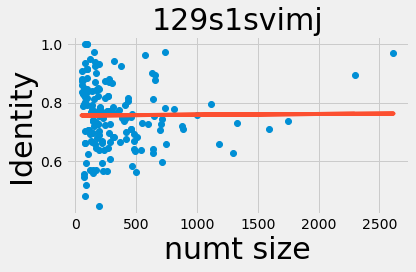

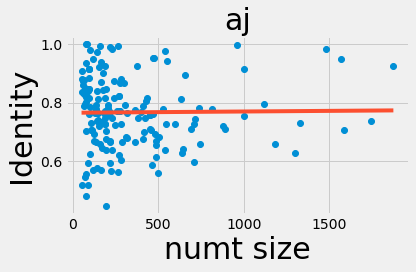

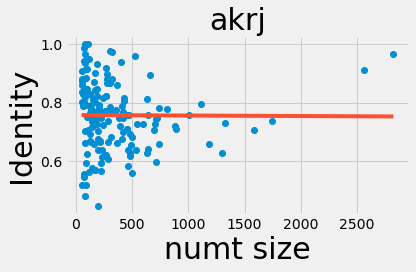

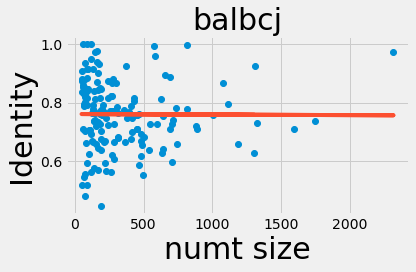

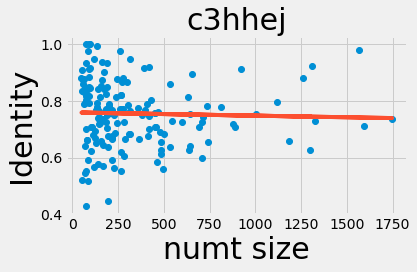

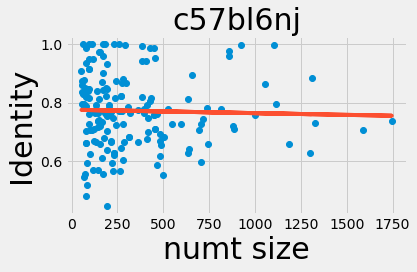

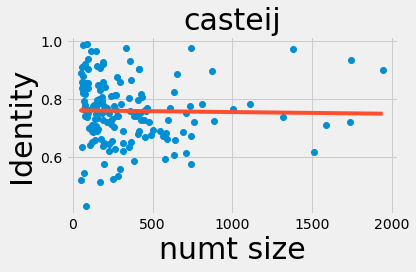

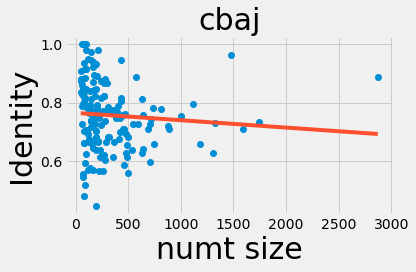

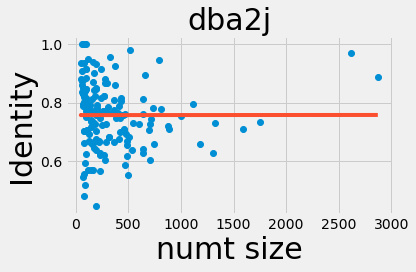

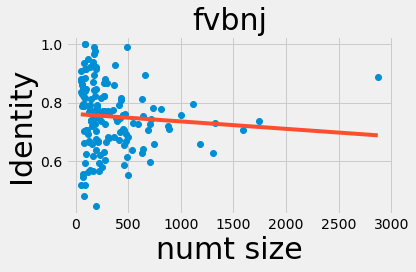

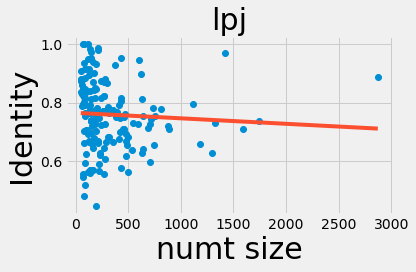

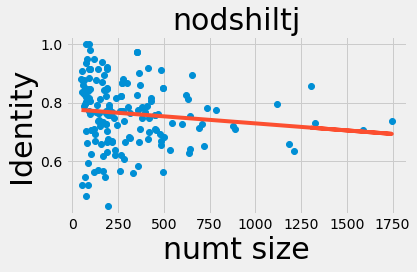

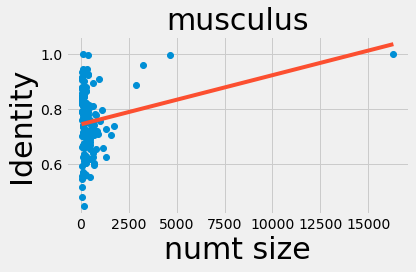

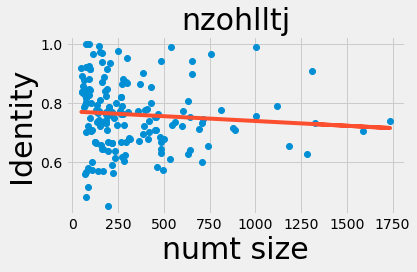

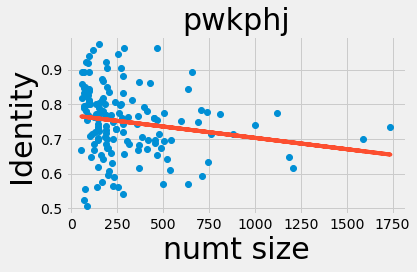

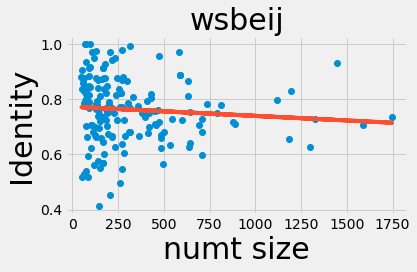

In [85]:
subdfs=pd.Series(merged_df['organism_name'].unique()).apply(
    lambda org_name:merged_df.loc[merged_df['organism_name']==org_name])
subdfs.index=merged_df['organism_name'].unique()
tracker=0
def plotter(subdf):
    global tracker
    fig,axs=plt.subplots(1,1)
    axs.plot(subdf['g_length'],subdf['identity'],'o')
    axs.set_ylabel('Identity',fontsize=30)
    corr=pearsonr(subdf['g_length'],subdf['identity'])
    axs.set_xlabel(f'numt size',fontsize=30)
    title=subdf['organism_name'].unique()[0].split('_')[-1]
    axs.set_title(title,fontsize=30)
    m, b = np.polyfit(subdf['g_length'],subdf['identity'], 1)
    plt.plot(subdf['g_length'], m*subdf['g_length'] + b)
    plt.tight_layout()
    plt.savefig(figs_dir+f'{title}_identity_vs_numt_size.png', dpi=200)
    tracker+=1
    print(tracker)
subdfs.apply(plotter)

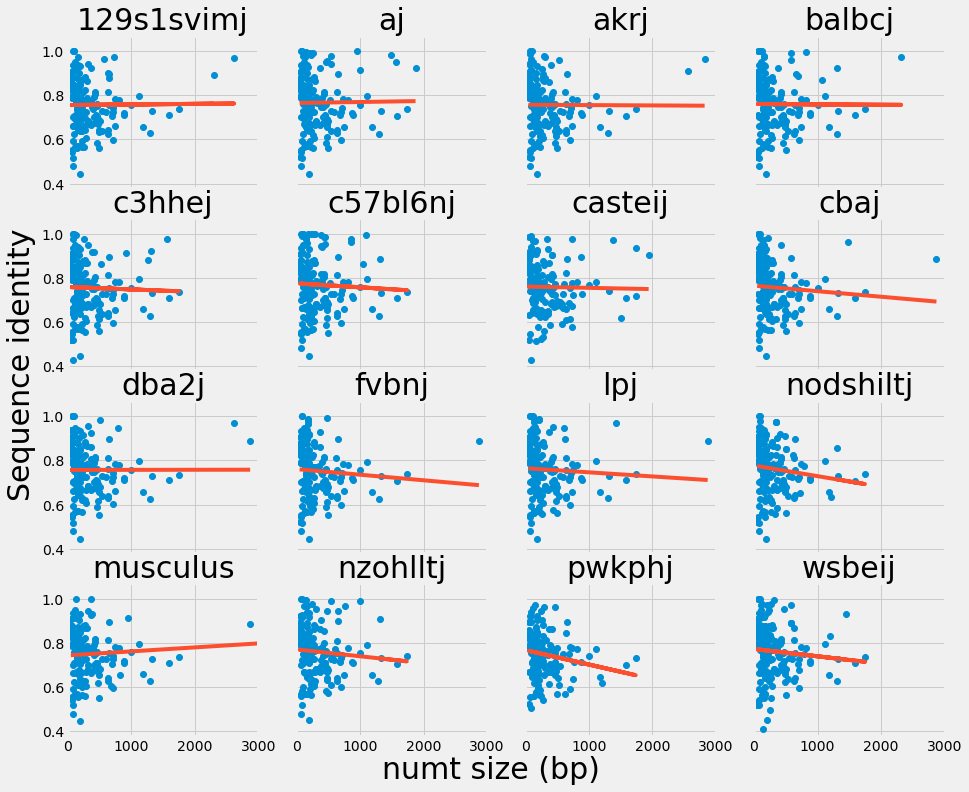

In [201]:
subdfs=pd.Series(merged_df['organism_name'].unique()).apply(
    lambda org_name:merged_df.loc[merged_df['organism_name']==org_name])
subdfs.index=merged_df['organism_name'].unique()
fig,axs=plt.subplots(4,4,figsize=(14,12),sharey=True,sharex=True)
fig.text(0.5, 0.02, 'numt size (bp)', ha='center',fontsize=30)
fig.text(0.02, 0.5, 'Sequence identity', va='center', rotation='vertical',fontsize=30)

def plotter(subdf):
    global row_tracker
    global column_tracker
    if column_tracker==4:
        column_tracker+=-4
        row_tracker+=1
    axs[row_tracker,column_tracker].plot(subdf['g_length'],subdf['identity'],'o')
    axs[row_tracker,column_tracker].set_xlim(0,3000)
    title=subdf['organism_name'].unique()[0].split('_')[-1]
    axs[row_tracker,column_tracker].set_title(title,fontsize=30)
    m, b = np.polyfit(subdf['g_length'],subdf['identity'], 1)
    axs[row_tracker,column_tracker].plot(subdf['g_length'], m*subdf['g_length'] + b)
    column_tracker+=1

row_tracker=0
column_tracker=0    
    
subdfs.apply(plotter)

#plt.tight_layout()
plt.savefig(figs_dir+'numts_vs_identity.png',dpi=200)

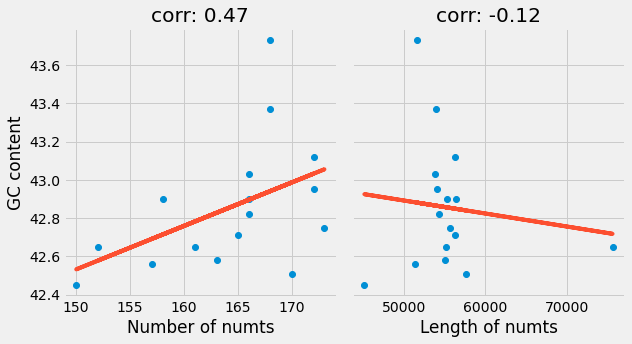

In [202]:
genome_gcs=pd.Series([42.90,42.51,42.71,42.58,42.82,43.12,42.90,43.37,42.65,42.56,43.03,43.73,42.6486,42.75,42.45,42.95])
genome_gcs.index=subdfs.index.values
fig,axs=plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].plot(number_of_numts,genome_gcs,'o')
axs[0].set_title(f'corr: {np.round(pearsonr(number_of_numts,genome_gcs)[0],2)}')
axs[0].set_xlabel('Number of numts')
m0, b0 = np.polyfit(number_of_numts,genome_gcs, 1)
axs[0].plot(number_of_numts, m0*number_of_numts + b0)

axs[1].plot(length_of_numts,genome_gcs,'o')
axs[1].set_title(f'corr: {np.round(pearsonr(length_of_numts,genome_gcs)[0],2)}')
axs[1].set_xlabel('Length of numts')
axs[0].set_ylabel('GC content')
m1, b1 = np.polyfit(length_of_numts,genome_gcs, 1)
axs[1].plot(length_of_numts, m1*length_of_numts + b1)

plt.tight_layout()
plt.savefig(figs_dir+'gc_numt_number_and_length_corr.png',dpi=200)

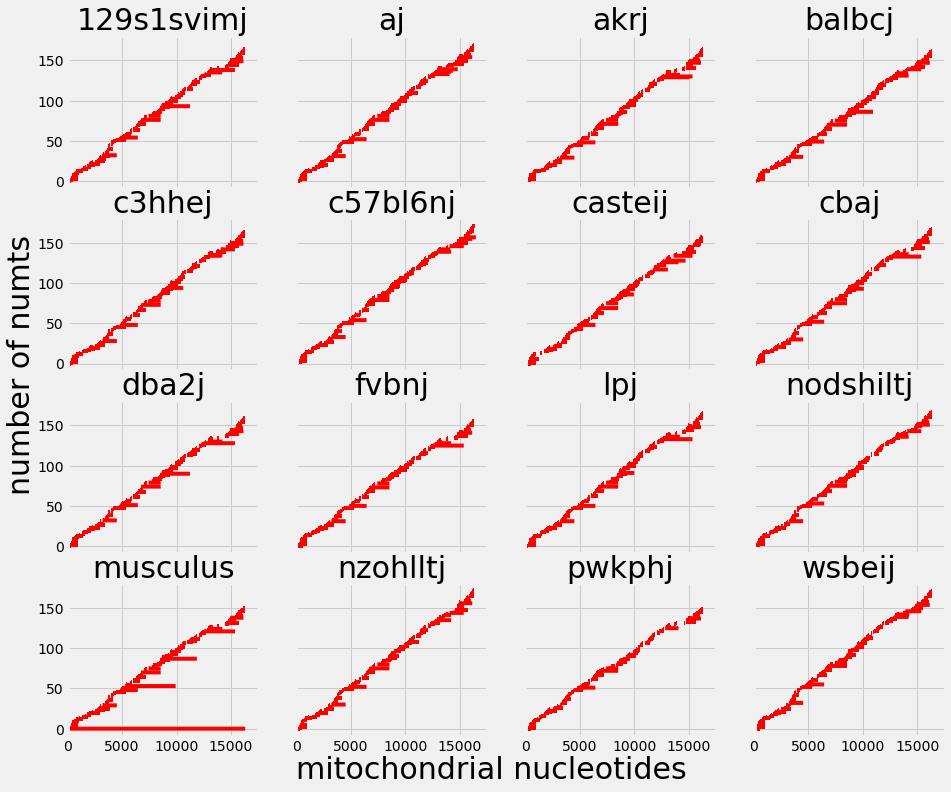

In [216]:
fig,axs=plt.subplots(4,4,figsize=(14,12),sharey=True,sharex=True)
fig.text(0.5, 0.02, 'mitochondrial nucleotides', ha='center',fontsize=30)
fig.text(0.02, 0.5, 'number of numts', va='center', rotation='vertical',fontsize=30)

def numt_plotter(subdf):
    global row_tracker
    global column_tracker
    if column_tracker==4:
        column_tracker+=-4
        row_tracker+=1
    subdf=subdf.sort_values(by='mt_start')
    axs[row_tracker,column_tracker].set_xlim(0,17500)
    xs=subdf.apply(lambda row:np.arange(row['mt_start'],(row['mt_start']+row['mt_length']),1),axis=1).tolist()
    for index,x in enumerate(xs):
        y=len(x)*[index]
        axs[row_tracker,column_tracker].plot(x,y,'r')
    title=subdf['organism_name'].unique()[0].split('_')[-1]
    axs[row_tracker,column_tracker].set_title(title,fontsize=30)
    column_tracker+=1

column_tracker=0    
row_tracker=0

subdfs.apply(numt_plotter)

plt.savefig(figs_dir+'mitochondrial_origins.png',dpi=200)

In [13]:
import os
import pandas as pd
numts=pd.read_csv('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/Mus_musculus_spreteij_numts.csv')
g_ids=['10', '5', '8', '1', '4', '17', '9', '14', '6', '12', '18', '3',
       '16', '2', '15', '13', '7', '11']
numts=numts.loc[numts['g_id'].isin(g_ids)]
numts

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence
0,973,0.000000e+00,0.000000e+00,10,88517024,2649,1153,1149,+,+,131945496,ATCCTCTAACCTAGAGAAGGTTATTAGGGTGGCAGAGCCAGGAAAT...,ATCCTCTAACCTAGAGAAGGTTATTAGGGTGGCAGAGCCAGGAAAT...
1,689,0.000000e+00,0.000000e+00,5,83586700,4841,1583,1599,+,+,152823684,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAATGATAACTCACCAAACAaaaactaaacctaacctaaTATTTT...
2,661,7.800000e-298,1.100000e-301,10,88519229,3811,804,802,+,+,131945496,TTCGTGCTACCTAAACACCTCATCCTATAGTAAGGTCAGCTAATTA...,TTCGTGCTACCTAAACACCTCATCCTATAGTAAGGTCAGCTAATTA...
3,449,6.400000e-197,9.400000e-201,8,101584168,14922,1180,1213,+,+,130317789,ACCCGCTCCATACCCTACCCCATATTAAACCAGAATGATACTTCCT...,ACCCACTAAACACCCCACCACATATTAAACCCGAATGATATTTCCT...
4,437,3.300000e-191,4.900000e-195,1,133808688,15446,609,606,+,+,198846266,atggtacattAATGtatatggtacattaatttatCTACCTCTAGCA...,atagtacatttatgtatatcgtacattaAATTATATTCCCCAAGCA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,41,1.000000e-02,1.600000e-06,5,115963696,11783,95,95,+,-,152823684,TTCAGTAATGCCGTAGATAGGCAATATGGAAGGATGGCAATTATTC...,TTGAGTAGTGTAAGAGATGGGTTATAAGGAAGAATTGCTAGTATTC...
154,41,1.000000e-02,1.600000e-06,6,82884678,3839,57,57,+,-,150978388,GTTGGGCCTTCTATAGCTGATGGAAGTCATGGATGAAGTCCGAATT...,GTAGGGCCTTCTATTGCTGATGGTAGTCATGGGTGGAGACCAAATT...
155,41,1.000000e-02,1.600000e-06,6,120583627,10964,67,67,+,-,150978388,TTTATGAATATAGGTAACATGGCTGAGGAAGCGTCAGACTATGAAT...,TTAATGAACATAGGTAAAATGGCTGAGTAAGCATTAGACTGTAAAT...
156,41,1.000000e-02,1.600000e-06,7,23586654,15588,65,65,+,-,136257712,AACATCATTTTAGGGTTTGCTGAAGATGGCCATGTATTGACTAAAC...,AATACCTTTTTAGGGTTTGCTGAAGATGGCGGTATATAGGCTGAAT...


In [15]:
with open('/Volumes/motilin/balint/numt/mice_strains_numt/genomic_regions/mm_spretus_gene_ensembl.txt','w')as output:
    numts.apply(
        lambda row: output.write(row['g_id']+':'+str(row['g_start'])+':'+str(row['g_start']+row['g_length'])+'\n'),axis=1)